In [33]:
import numpy as np
from scipy.integrate import odeint
from typing import Tuple
from scipy.interpolate import splrep, BSpline

def generate_sample(params: Tuple[float, float, float], tspan: np.ndarray) -> np.ndarray:

    def dUdt(t, U, a, b):
        x, y = U

        return [a*x - x*y, b*x*y - y] 

    alpha, beta, sigma = params[0], params[1], params[2]

    # Define initial conditions
    x0, y0 = 0.5, 0.5
    S0 = (x0, y0)

    # Solve the equation with given initial conditions
    sol_dUdt = odeint(dUdt, y0=S0, t=tspan, args=(alpha, beta), tfirst=True)

    # Generate noise
    noise = np.random.normal(0, sigma, (len(tspan), 2))
    sol_dUdt = sol_dUdt + noise

    return sol_dUdt

def fit_spline(tspan: np.ndarray, data: np.ndarray, s: int=270) -> np.ndarray:
    spline = splrep(tspan, data, s=s)
    spline_data = BSpline(*spline)(tspan)

    return spline_data

In [27]:
import matplotlib.pyplot as plt

In [28]:
def generate_sample_linear(params: Tuple[float, float], tspan: np.ndarray) -> np.ndarray:

    def dUdt(t, U, a, b):
        x, y = U

        return [a*x - x*y, b*x*y - y] 

    alpha, beta = params[0], params[1]

    # Define initial conditions
    x0, y0 = 0.5, 0.5
    S0 = (x0, y0)

    # Solve the equation with given initial conditions
    sol_dUdt = odeint(dUdt, y0=S0, t=tspan, args=(alpha, beta), tfirst=True)

    # Generate noise
    noise = np.random.normal(0, 0.5 * tspan[:,np.newaxis], (len(tspan), 2))
    sol_dUdt = sol_dUdt + noise

    return sol_dUdt

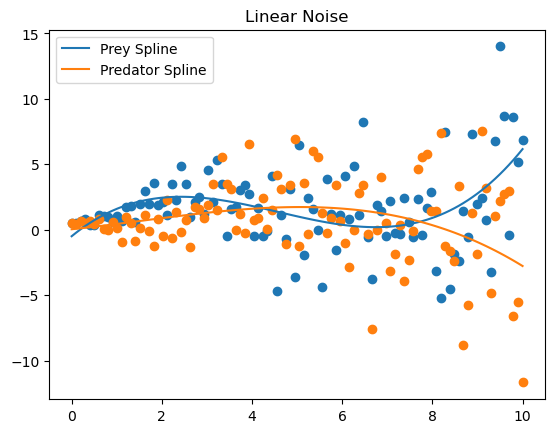

In [49]:
import matplotlib.pyplot as plt
# np.random.seed(907)
tspan = np.linspace(0, 10, 100)
a = generate_sample_linear((1, 1), tspan)
true = generate_sample((1,1,0), tspan)
prey = fit_spline(tspan, a[:,0], s=1000)
pred = fit_spline(tspan, a[:,1], s=1000)
res = np.column_stack((prey, pred))
plt.scatter(tspan, a[:,0])
plt.scatter(tspan, a[:,1])
plt.plot(tspan, prey, label="Prey Spline")
plt.plot(tspan, pred, label = "Predator Spline")
# plt.plot(tspan, true)
plt.legend()
plt.title("Linear Noise")
plt.show()